In [33]:
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
import os
import data_visualization as dv
import dill
import scipy 
from scipy.stats import norm
from scipy import stats
import sys
import importlib
import pingouin as pg
import pandas as pd
import analysis_utilities as au
from itertools import combinations
from IPython.display import display

'''
Using function now instead of writing things over and over again 
'''

'\nUsing function now instead of writing things over and over again \n'

In [34]:
sys.path.insert(0,r'D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement')
from Subject_Object_v3 import SubjectBuilder, perc
import plot_functions as pf
import read_data_functions as rdf
import Statistics_Object
from initializer import InitialThangs

%load_ext autoreload
%autoreload 2
'''
'''

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'\n'

## Initial Thangs

In [35]:
experiment = 'Exp2'
it = InitialThangs(experiment)

In [36]:
plt.style.use('cashaback_dark')
wheel = dv.ColorWheel()
os.getcwd()

'D:\\OneDrive - University of Delaware - o365\\Subject_Data\\MatchPennies_Agent_Exp2'

## Pickle Objects

In [37]:
group = rdf.generate_subject_object_v3(experiment,)

d:\onedrive - university of delaware - o365\desktop\matchpennies-agent-expirement\src\read_data_functions.py:186: RuntimeWarning: invalid value encountered in multiply
  agent_reaction_decision_array = np.empty((NUM_SUBJECTS, REACTION_BLOCKS,REACTION_TRIALS))*np.nan


## Set Save to True or False

In [38]:
save = False

In [39]:
np.any(group.raw_data.agent_task_decision_array == 0)

False

In [40]:
group.movement_metrics.correct_initial_decisions

array([[73, 72, 54, 63],
       [56, 44, 44, 44],
       [57, 67, 45, 74],
       [49, 66, 48, 63],
       [65, 69, 64, 71],
       [60, 61, 64, 64],
       [49, 60, 57, 59],
       [41, 49, 40, 45],
       [62, 71, 40, 52],
       [70, 49, 49, 59],
       [37, 48, 35, 35],
       [71, 77, 45, 55],
       [43, 54, 42, 44],
       [45, 51, 42, 50],
       [58, 60, 67, 62],
       [41, 44, 46, 46],
       [49, 60, 42, 49],
       [70, 64, 57, 71],
       [37, 55, 38, 41],
       [73, 71, 66, 70],
       [73, 64, 69, 63],
       [43, 64, 50, 52],
       [62, 58, 56, 57],
       [43, 50, 41, 54]], dtype=int64)

## Create DataFrame for Pingouin

In [42]:
wins                 = perc(group.score_metrics.score_metric('wins')).flatten().tolist()
indecisions          = perc(group.score_metrics.score_metric('indecisions')).flatten().tolist()
incorrects           = perc(group.score_metrics.score_metric('incorrects')).flatten().tolist()
correct_decisions    = perc(group.movement_metrics.correct_initial_decisions).flatten().tolist()
median_leave_time    = np.nanmedian(group.movement_metrics.movement_onset_times('task'),axis=2).flatten().tolist()
q1_median_leave_time = np.nanquantile(group.movement_metrics.movement_onset_times('task'),0.25,axis=2).flatten().tolist()
q3_median_leave_time = np.nanquantile(group.movement_metrics.movement_onset_times('task'),0.75,axis=2).flatten().tolist()
leave_time_sd        = np.nanstd(group.movement_metrics.movement_onset_times('task'),axis=2).flatten().tolist()
gamble_leave_time    = np.nanmedian(group.react_guess_movement_metrics.react_guess_movement_onset_times('react'),axis=2).flatten().tolist()
median_movement_time        = np.nanmedian(group.movement_metrics.movement_times('task'),axis=2).flatten().tolist()
reaction_decisions   = perc(group.react_guess_score_metrics.total_reaction_guess('react')) .flatten().tolist()
gamble_decisions   = perc(group.react_guess_score_metrics.total_reaction_guess('guess')) .flatten().tolist()
wins_when_both_decide = group.score_metrics.wins_when_both_reach(perc=True).flatten().tolist()
subject_number = np.repeat(np.arange(1,it.num_subjects+1,1,dtype=int),it.num_blocks).tolist()
condition = np.tile(np.arange(1,it.num_blocks+1,1,dtype=int),it.num_subjects).tolist()
# alt_condition = np.tile(['1000 (50)','1000 (150)','1100 (50)','1100 (150)', '1200 (50)', '1200 (150)'],it.num_subjects).tolist()
if experiment == 'Exp1':
    factor1 = np.tile(['1000','1000','1100','1100','1200','1200'],it.num_subjects) 
    factor2 = np.tile(['50','150'],it.num_subjects*3)    
    points = np.full_like(wins,0)
else:
    factor1 = np.tile(['0 Inc','-1 Inc','0 Inc','-1 Inc'],it.num_subjects) 
    factor2 = np.tile(['0 Ind','0 Ind','-1 Ind','-1 Ind'],it.num_subjects) 
    points = group.score_metrics.exp2_points_scored.flatten().tolist()
    decision_time_difference_punish_incorrects = np.nanmedian(group.movement_metrics.movement_onset_times('task'),axis=2)[0] - np.nanmedian(group.movement_metrics.movement_onset_times('task'),axis=2)[1] 
    decision_time_difference_punish_indecisions = np.nanmedian(group.movement_metrics.movement_onset_times('task'),axis=2)[0] - np.nanmedian(group.movement_metrics.movement_onset_times('task'),axis=2)[2]  
df_metrics = pd.DataFrame(np.array([median_leave_time,median_movement_time,wins,indecisions,incorrects,correct_decisions,wins_when_both_decide,
                                    gamble_leave_time,leave_time_sd,q1_median_leave_time,q3_median_leave_time,
                                    reaction_decisions,gamble_decisions,points]).T,
                        columns=['Median Leave Time','Median Movement Time','Wins','Indecisions','Incorrects','Correct Decisions','Wins When Both Decide',
                                 'Median Gamble Leave Time','SD Leave Time','Q1 Leave Time','Q3 Leave Time','Reaction Decisions','Gamble Decisions','Points'])
df_conditions = pd.DataFrame(np.array([subject_number,condition,factor1,factor2]).T,columns = ['Subject','Condition','Factor 1','Factor 2'])
# df_metrics.astype('float64')

# df = df.astype({'Subject':'int32','Condition':'int32','Condition Mean':'int32','Condition SD':'int32'})
# dill.dump(df,open(save_path+'\\metrics_df_all_subjects.pkl','wb')) 
df = pd.concat([df_conditions,df_metrics],axis=1)
# assert ~df.isnull().any(axis=1).any(),('NaN Values found in dataframe')
display(df.iloc[6:12])

c:\Users\Seth Sullivan\anaconda3\envs\aim1\lib\site-packages\numpy\lib\nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


,Subject,Condition,Factor 1,Factor 2,Median Leave Time,Median Movement Time,Wins,Indecisions,Incorrects,Correct Decisions,Wins When Both Decide,Median Gamble Leave Time,SD Leave Time,Q1 Leave Time,Q3 Leave Time,Reaction Decisions,Gamble Decisions,Points
6,2,3,0 Inc,-1 Ind,1101.0,246.0,38.75,28.75,32.50,55.00,54.385965,1349.0,283.157728,817.25,1298.25,30.00,70.00,43.0
7,2,4,-1 Inc,-1 Ind,1226.0,238.0,30.00,37.50,32.50,55.00,48.000000,1350.5,167.895290,1075.00,1317.00,38.75,61.25,44.0
8,3,1,0 Inc,0 Ind,1317.0,169.0,48.75,35.00,16.25,71.25,75.000000,1346.0,69.298737,1274.00,1347.25,53.75,46.25,49.0
9,3,2,-1 Inc,0 Ind,1330.0,153.0,53.75,43.75,2.50,83.75,95.555556,1346.0,60.634638,1297.25,1375.00,81.25,18.75,61.0
10,3,3,0 Inc,-1 Ind,1224.5,182.0,52.50,10.00,37.50,56.25,58.333333,1339.0,117.114244,1124.75,1297.00,27.50,72.50,34.0
11,3,4,-1 Inc,-1 Ind,1362.0,116.0,67.50,31.25,1.25,92.50,98.181818,1362.0,45.318234,1327.00,1383.50,92.50,7.50,42.0


## Initialize bootstrap

In [43]:
so = Statistics_Object.Statistics(df, experiment = experiment, num_subjects = it.num_subjects, num_blocks=it.num_blocks,num_trials=it.num_trials,trial_block_titles=it.trial_block_titles,
                                  xlab=it.xlabel, f1_xticklabels=it.f1_collapse_xticklabs,f2_xticklabels=it.f2_collapse_xticklabs,f1_xlabel=it.f1_xlabel,f2_xlabel=it.f2_xlabel,
                                  M = 1e6)

In [44]:
_,b = so.run_statistics('Median Leave Time',change_m=1e2)
_,b = so.run_statistics('Median Leave Time',change_m=1e2,test='median')

Non-significant interaction, collapsing across conditions...
Non-significant interaction, collapsing across conditions...


## Median Leave Times

Non-significant interaction, collapsing across conditions...


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Factor 1,93906.315104,1,23,93906.315104,16.784232,0.000442,0.000442,0.078188,1.0
1,Factor 2,37071.690104,1,23,37071.690104,12.883761,0.001550,0.001550,0.032400,1.0
2,Factor 1 * Factor 2,2076.690104,1,23,2076.690104,1.239047,0.277154,0.277154,0.001872,1.0


Collapsing, changed select conditions to be All


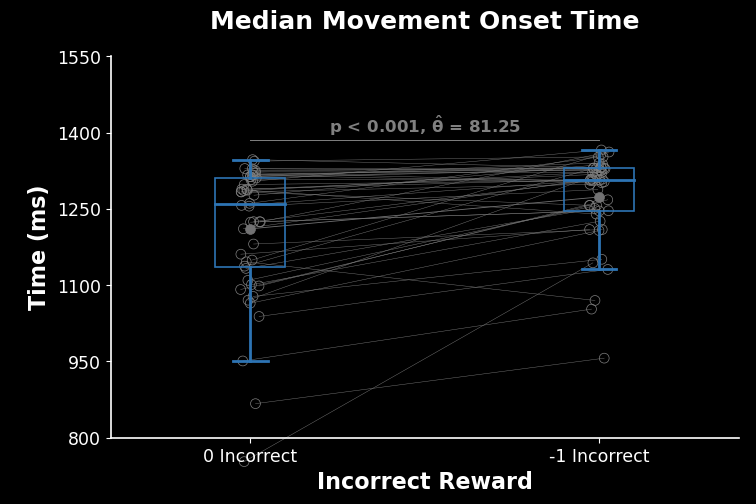

Collapsing, changed select conditions to be All


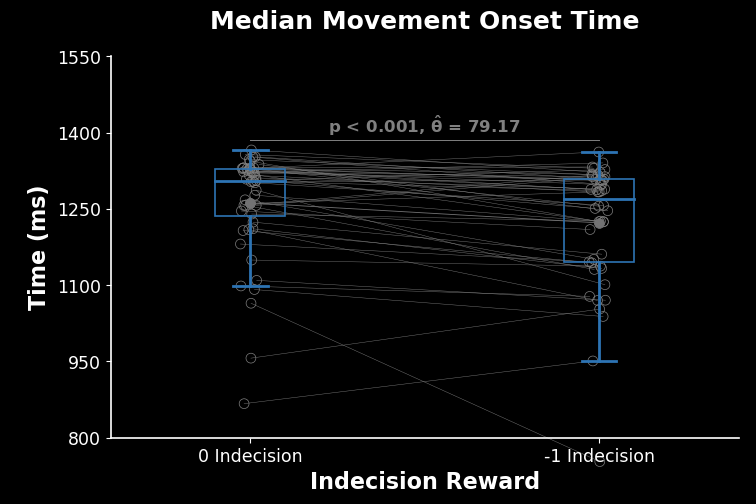

In [45]:
median_leave_time_anova,median_leave_time_statistics = so.run_statistics('Median Leave Time')
display(median_leave_time_anova)
so.plot(median_leave_time_statistics,'Median Leave Time',title='Median Movement Onset Time',
                    ylab='Time (ms)',title_pad = 20,ylocs=np.arange(800,1650,150),lims=True)

## Median Movement Times

Non-significant interaction, collapsing across conditions...


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Factor 1,1763.877604,1,23,1763.877604,5.641124,0.026264,0.026264,0.006918,1.0
1,Factor 2,164.065104,1,23,164.065104,1.236200,0.277692,0.277692,0.000648,1.0
2,Factor 1 * Factor 2,1.377604,1,23,1.377604,0.010095,0.920839,0.920839,0.000005,1.0


!! Factor 2 is not significant !!
Collapsing, changed select conditions to be All


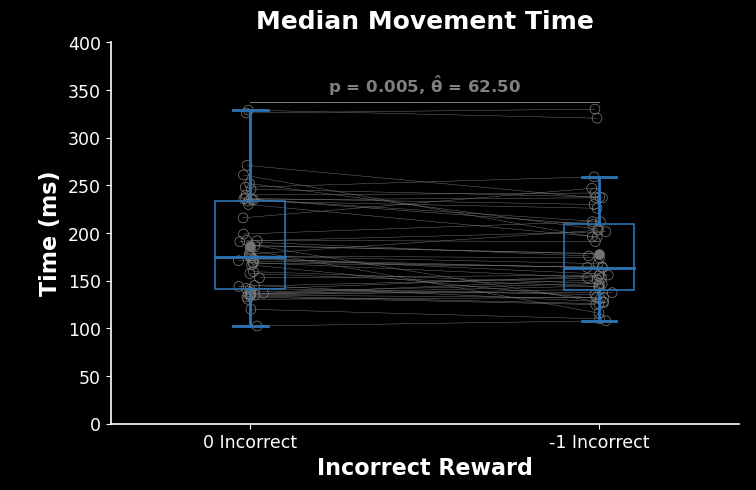

Collapsing, changed select conditions to be All


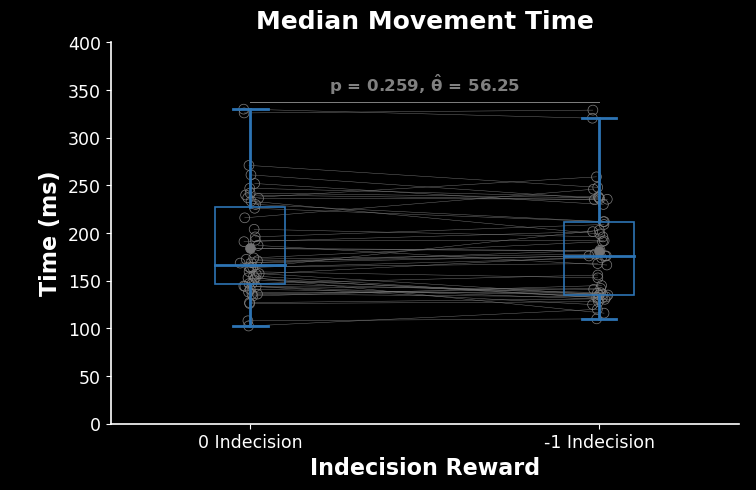

In [46]:
median_movement_time_anova,median_movement_time_statistics = so.run_statistics('Median Movement Time')
display(median_movement_time_anova)
so.plot(median_movement_time_statistics,'Median Movement Time',title='Median Movement Time',
                    ylab='Time (ms)',ylocs=np.arange(0,450,50),lims=True)

## SD Leave Times

Non-significant interaction, collapsing across conditions...


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Factor 1,5094.493890,1,23,5094.493890,6.486379,0.018025,0.018025,0.015257,1.0
1,Factor 2,2.925356,1,23,2.925356,0.002475,0.960754,0.960754,0.000009,1.0
2,Factor 1 * Factor 2,3428.820244,1,23,3428.820244,2.624392,0.118864,0.118864,0.010320,1.0


!! Factor 2 is not significant !!
Collapsing, changed select conditions to be All


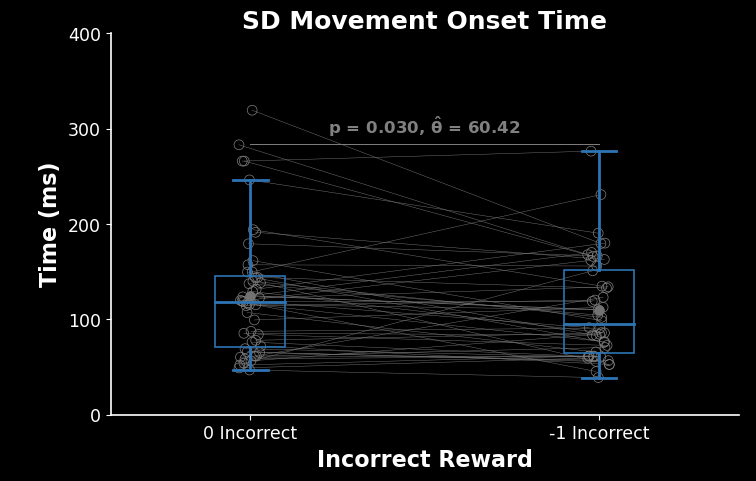

Collapsing, changed select conditions to be All


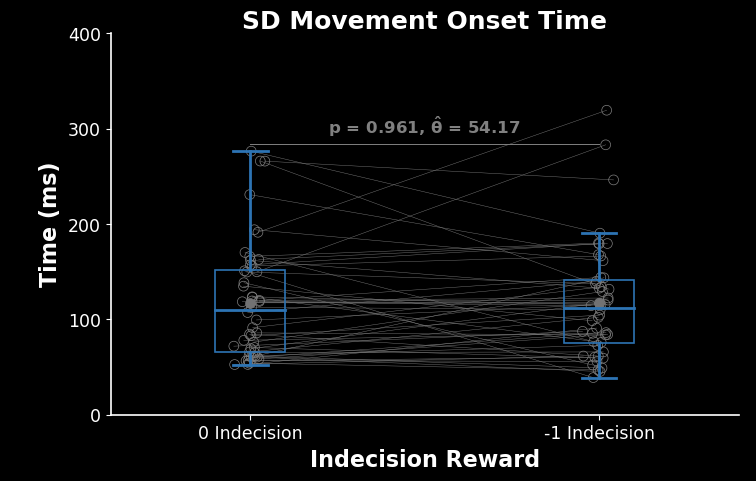

In [47]:
sd_leave_time_anova,sd_leave_time_statistics = so.run_statistics('SD Leave Time')
display(sd_leave_time_anova)
so.plot(sd_leave_time_statistics,'SD Leave Time',title='SD Movement Onset Time',
                    ylab='Time (ms)',ylocs=np.arange(0,450,100),title_pad = 0,lims=True,cut_pvals=False)

## First Quartile Leave Time

Non-significant interaction, collapsing across conditions...


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Factor 1,137070.377604,1,23,137070.377604,17.151106,0.000396,0.000396,0.059396,1.0
1,Factor 2,39833.127604,1,23,39833.127604,6.022958,0.022113,0.022113,0.018020,1.0
2,Factor 1 * Factor 2,4676.041667,1,23,4676.041667,0.971256,0.334622,0.334622,0.002150,1.0


Collapsing, changed select conditions to be All


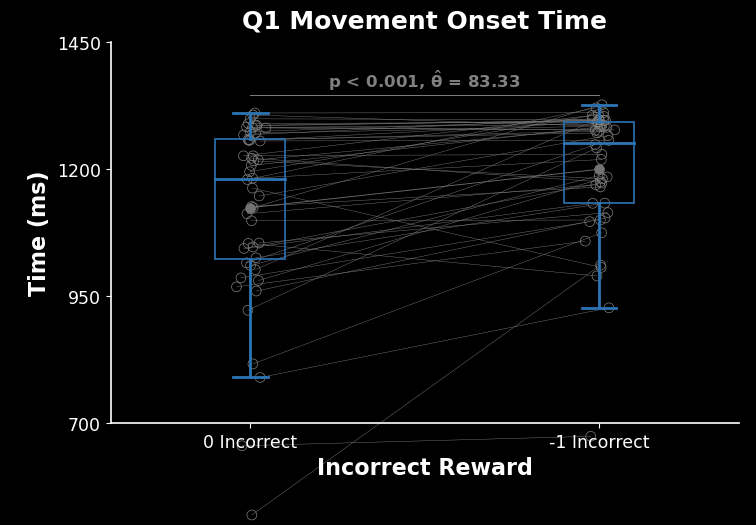

Collapsing, changed select conditions to be All


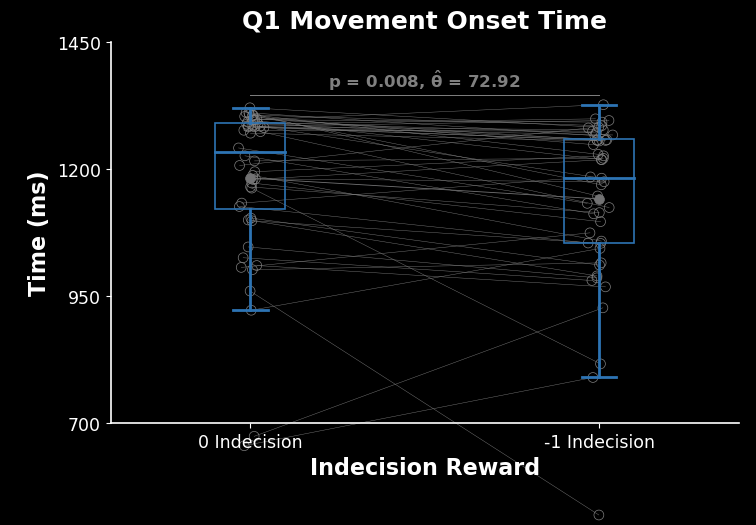

In [48]:
q1_leave_time_anova,q1_leave_time_statistics = so.run_statistics('Q1 Leave Time')
display(q1_leave_time_anova)
so.plot(q1_leave_time_statistics,'Q1 Leave Time',title='Q1 Movement Onset Time',
                    ylab='Time (ms)',ylocs=np.arange(700,1600,250),lims=True)

## Third Quartile Leave Time

Non-significant interaction, collapsing across conditions...


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Factor 1,52558.740234,1,23,52558.740234,11.734478,0.002311,0.002311,0.074750,1.0
1,Factor 2,24153.828776,1,23,24153.828776,15.307558,0.000699,0.000699,0.035798,1.0
2,Factor 1 * Factor 2,296.630859,1,23,296.630859,0.355400,0.556894,0.556894,0.000456,1.0


Collapsing, changed select conditions to be All


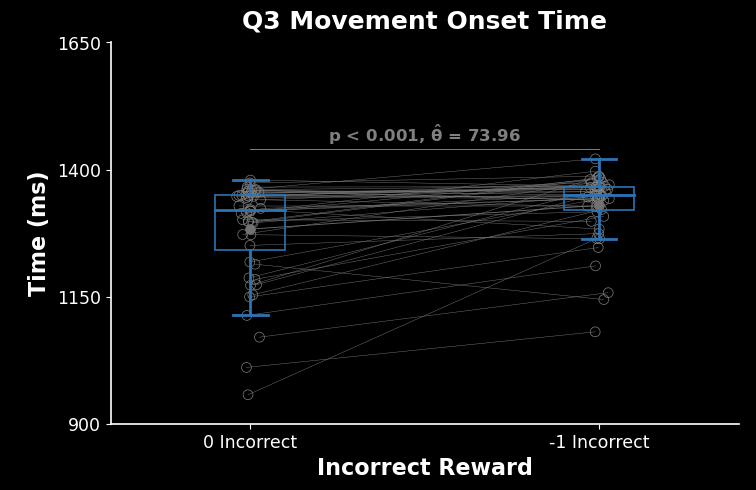

Collapsing, changed select conditions to be All


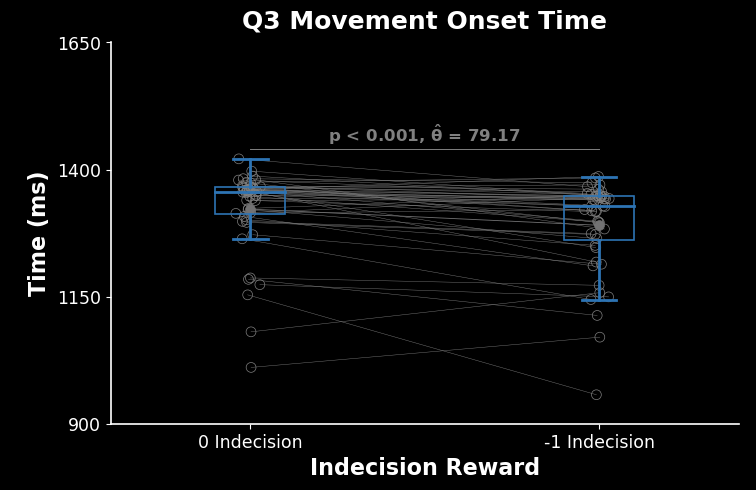

In [49]:
q3_leave_time_anova,q3_leave_time_statistics = so.run_statistics('Q3 Leave Time')
display(q3_leave_time_anova)
so.plot(q3_leave_time_statistics,'Q3 Leave Time',title='Q3 Movement Onset Time',
                    ylab='Time (ms)',ylocs=np.arange(900,1700,250),lims=True)

## Correct Decisions (Doesn't matter if indecision)

Non-significant interaction, collapsing across conditions...


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Factor 1,961.083984,1,23,961.083984,13.901704,0.001101,0.001101,0.055086,1.0
1,Factor 2,724.625651,1,23,724.625651,9.332097,0.005616,0.005616,0.042104,1.0
2,Factor 1 * Factor 2,27.360026,1,23,27.360026,0.537531,0.470865,0.470865,0.001657,1.0


Collapsing, changed select conditions to be All


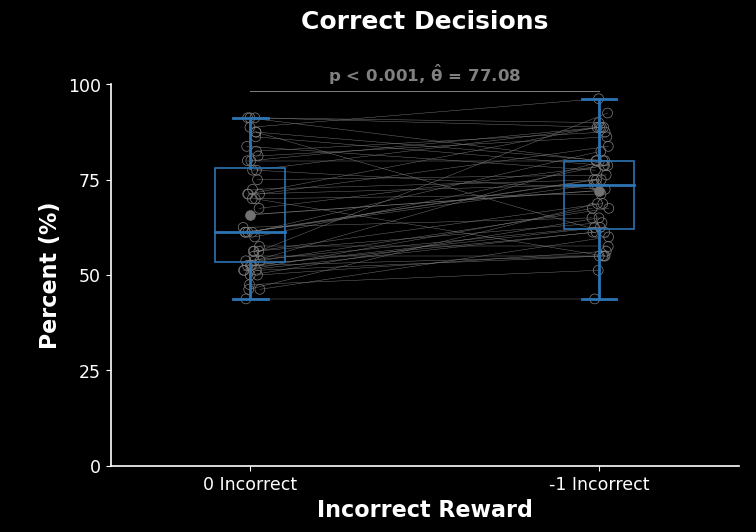

Collapsing, changed select conditions to be All


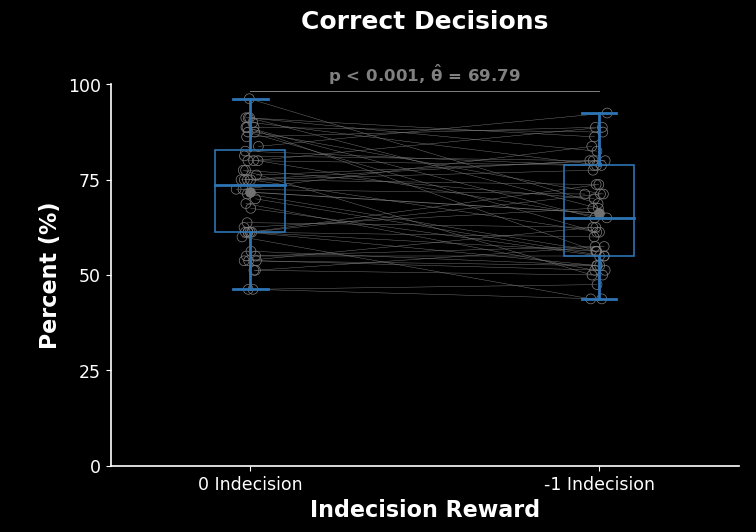

In [50]:
corrects_anova,corrects_statistics = so.run_statistics('Correct Decisions')
display(corrects_anova)
so.plot(corrects_statistics,'Correct Decisions',title='Correct Decisions',
                    ylab='Percent (%)',ylocs=np.arange(0,125,25),lims=True,title_pad=40,h=1)

## Wins When Both Decide

Non-significant interaction, collapsing across conditions...


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Factor 1,2621.337058,1,23,2621.337058,28.593252,0.000020,0.000020,0.082390,1.0
1,Factor 2,1327.322454,1,23,1327.322454,11.777962,0.002275,0.002275,0.043487,1.0
2,Factor 1 * Factor 2,0.973580,1,23,0.973580,0.016459,0.899033,0.899033,0.000033,1.0


Collapsing, changed select conditions to be All


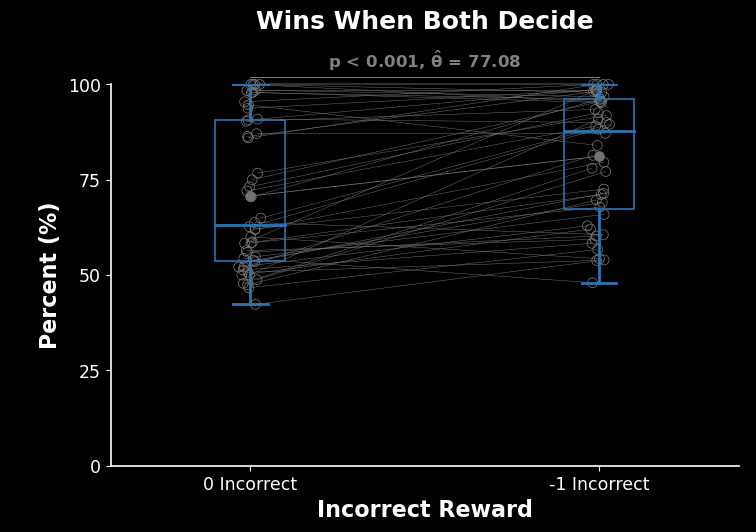

Collapsing, changed select conditions to be All


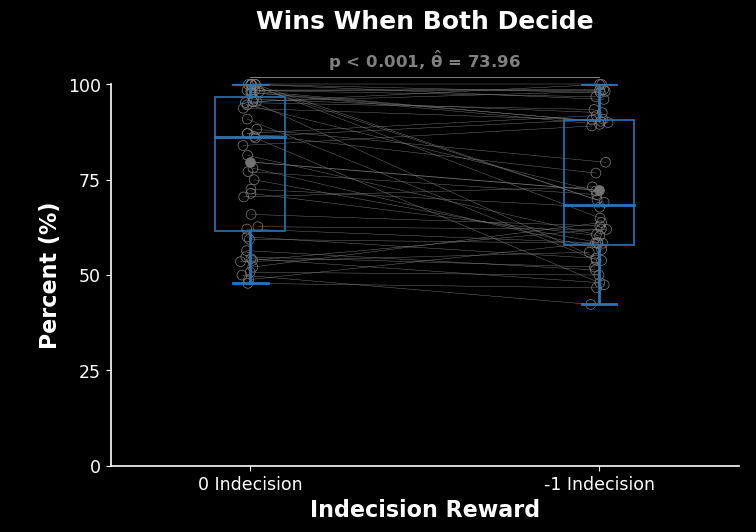

In [51]:
wins_when_both_decide_anova,wins_when_both_decide_statistics = so.run_statistics('Wins When Both Decide')
display(wins_when_both_decide_anova)
so.plot(wins_when_both_decide_statistics,'Wins When Both Decide',title='Wins When Both Decide',
                    ylab='Percent (%)',ylocs=np.arange(0,125,25),lims=True,title_pad=40,h=1)

# Points Scored

Non-significant interaction, collapsing across conditions...


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Factor 1,1107.041667,1,23,1107.041667,2.619150,0.119214,0.119214,0.027663,1.0
1,Factor 2,1107.041667,1,23,1107.041667,3.806850,0.063328,0.063328,0.027663,1.0
2,Factor 1 * Factor 2,24.000000,1,23,24.000000,0.121279,0.730819,0.730819,0.000616,1.0


!! Factor 1 is not significant !!
!! Factor 2 is not significant !!
Collapsing, changed select conditions to be All


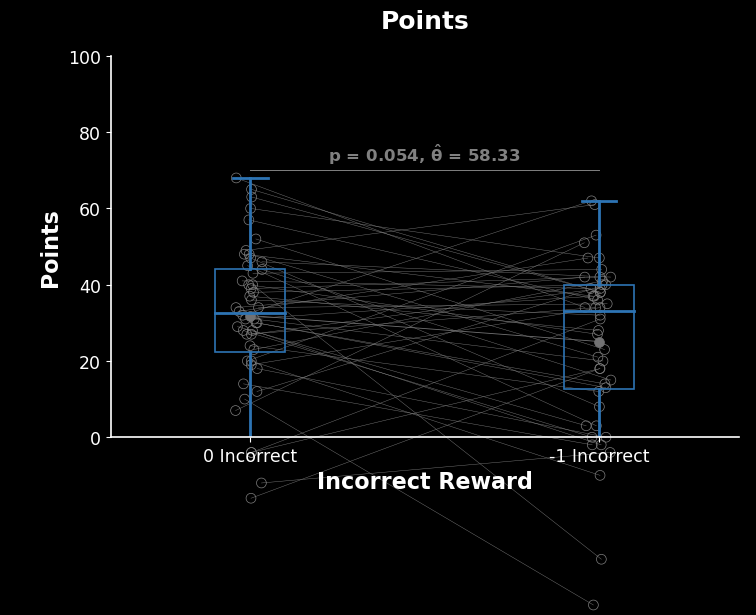

Collapsing, changed select conditions to be All


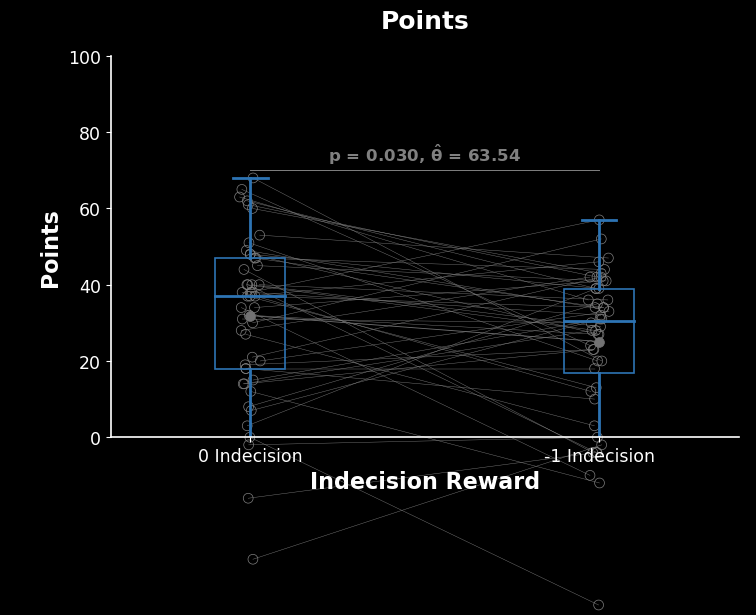

In [52]:
if experiment == 'Exp2':
    points_anova,points_statistics = so.run_statistics('Points')
    display(points_anova)
    so.plot(points_statistics,'Points',title='Points',
                    ylab='Points',ylocs=np.arange(0,101,20),lims=True,title_pad=20,h=1,cut_pvals=False)

## Wins

Non-significant interaction, collapsing across conditions...


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Factor 1,64.599609,1,23,64.599609,1.196250,0.285396,0.285396,0.003406,1.0
1,Factor 2,684.000651,1,23,684.000651,14.373504,0.000943,0.000943,0.034924,1.0
2,Factor 1 * Factor 2,101.578776,1,23,101.578776,2.237580,0.148288,0.148288,0.005345,1.0


!! Factor 1 is not significant !!
Collapsing, changed select conditions to be All


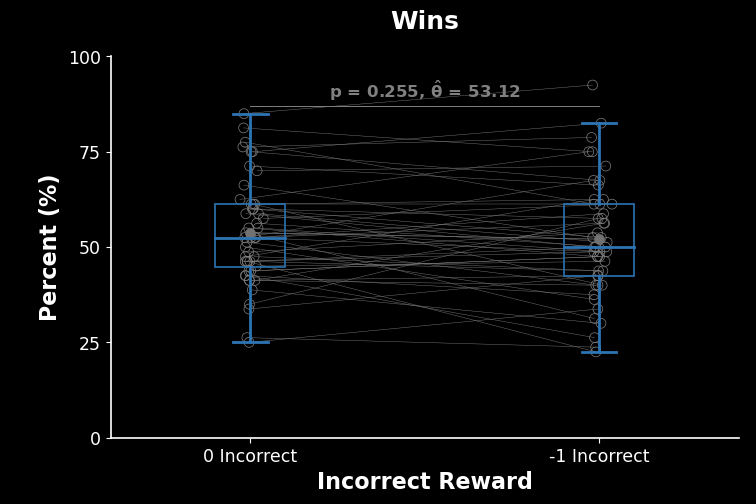

Collapsing, changed select conditions to be All


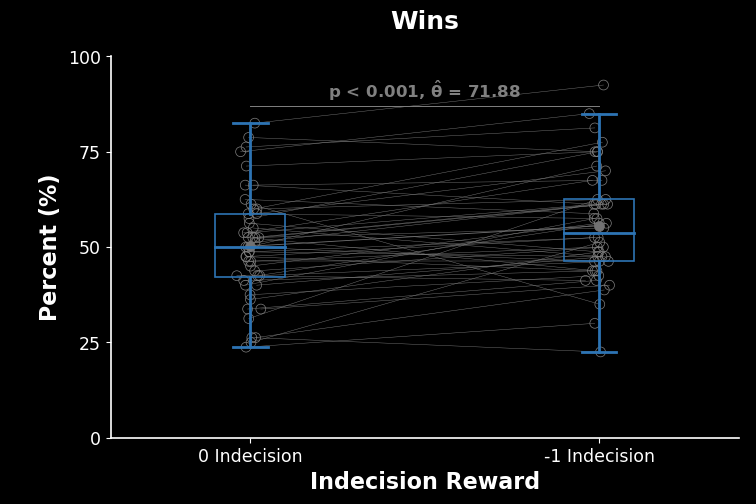

In [53]:
wins_anova,wins_statistics = so.run_statistics('Wins')
display(wins_anova)
so.plot(wins_statistics,'Wins',title='Wins',
                ylab='Percent (%)',ylocs=np.arange(0,125,25),lims=True,title_pad=20,h=1,cut_pvals=False)

## Incorrects

Non-significant interaction, collapsing across conditions...


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Factor 1,3223.063151,1,23,3223.063151,35.928712,0.000004,0.000004,0.141776,1.0
1,Factor 2,1594.547526,1,23,1594.547526,20.684693,0.000144,0.000144,0.075553,1.0
2,Factor 1 * Factor 2,3.662109,1,23,3.662109,0.068679,0.795603,0.795603,0.000188,1.0


Collapsing, changed select conditions to be All


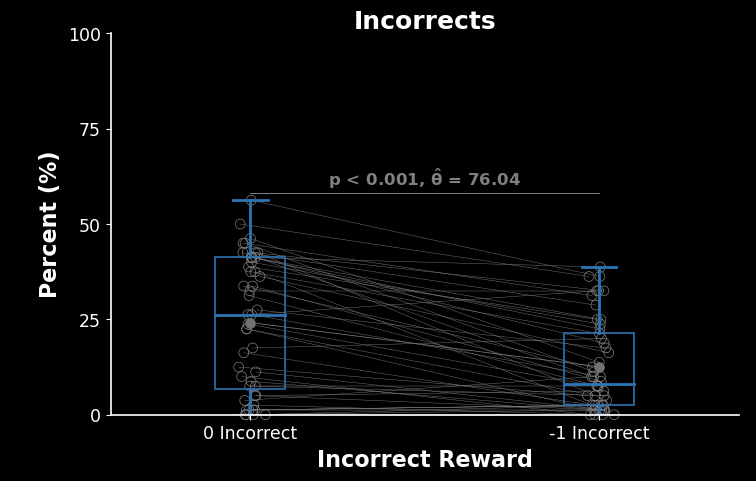

Collapsing, changed select conditions to be All


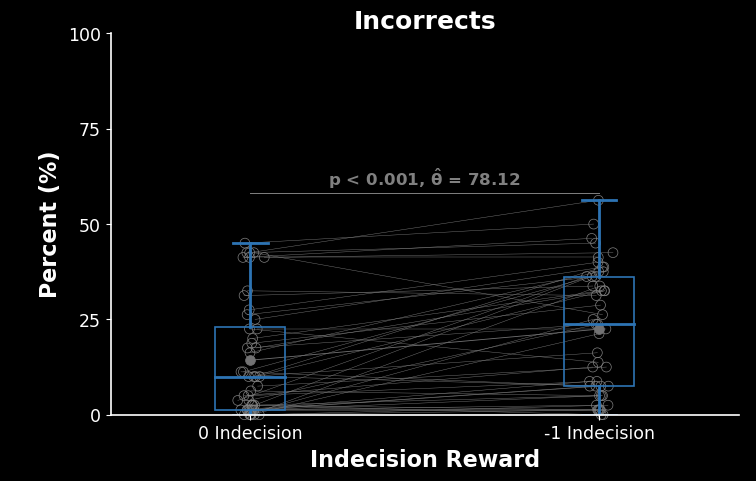

In [54]:
incorrects_anova,incorrects_statistics = so.run_statistics('Incorrects',test='median')
display(incorrects_anova)
so.plot(incorrects_statistics,'Incorrects',title='Incorrects',
                ylab='Percent (%)',ylocs=np.arange(0,125,25),lims=True,title_pad=0,h=0.5,
                cut_pvals = False)

## Indecisions

Non-significant interaction, collapsing across conditions...


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Factor 1,4200.260417,1,23,4200.260417,27.883870,2.332336e-05,2.332336e-05,0.194678,1.0
1,Factor 2,4367.252604,1,23,4367.252604,46.874161,5.560409e-07,5.560409e-07,0.200864,1.0
2,Factor 1 * Factor 2,66.666667,1,23,66.666667,0.747493,3.961991e-01,3.961991e-01,0.003822,1.0


Collapsing, changed select conditions to be All


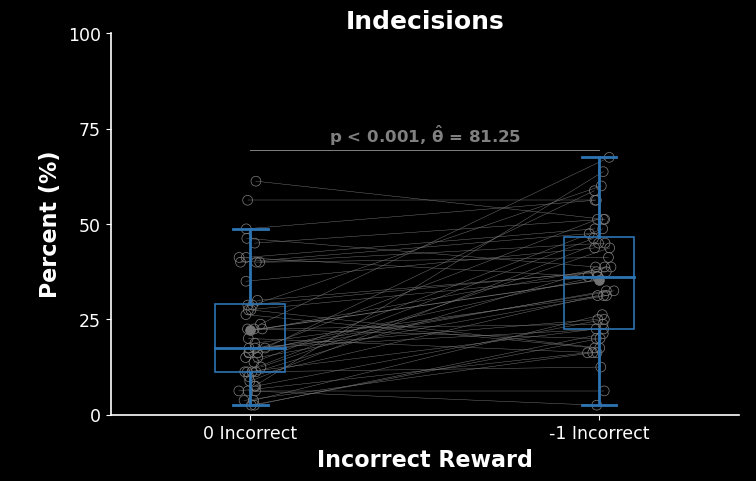

Collapsing, changed select conditions to be All


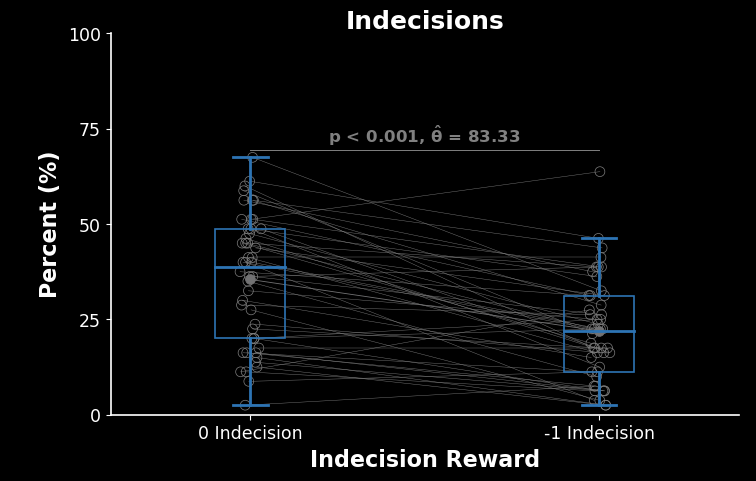

In [55]:
if experiment == 'Exp1':
    alternative = 'less'
else:
    alternative = 'two-sided'
    
indecisions_anova,indecisions_statistics = so.run_statistics('Indecisions',alternative = 'two-sided')
display(indecisions_anova)
so.plot(indecisions_statistics,'Indecisions',title='Indecisions',
                ylab='Percent (%)',ylocs=np.arange(0,125,25),lims=True,title_pad=0,h=0.5,
                cut_pvals = False)

# Reaction Decisions

Non-significant interaction, collapsing across conditions...


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Factor 1,5381.266276,1,23,5381.266276,19.102294,0.000224,0.000224,0.071550,1.0
1,Factor 2,4085.302734,1,23,4085.302734,17.384487,0.000369,0.000369,0.055271,1.0
2,Factor 1 * Factor 2,19.938151,1,23,19.938151,0.108060,0.745338,0.745338,0.000285,1.0


Collapsing, changed select conditions to be All


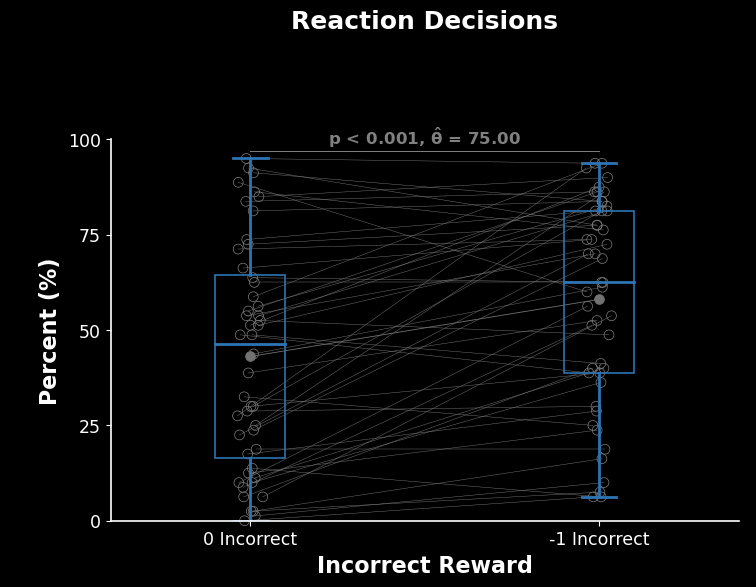

Collapsing, changed select conditions to be All


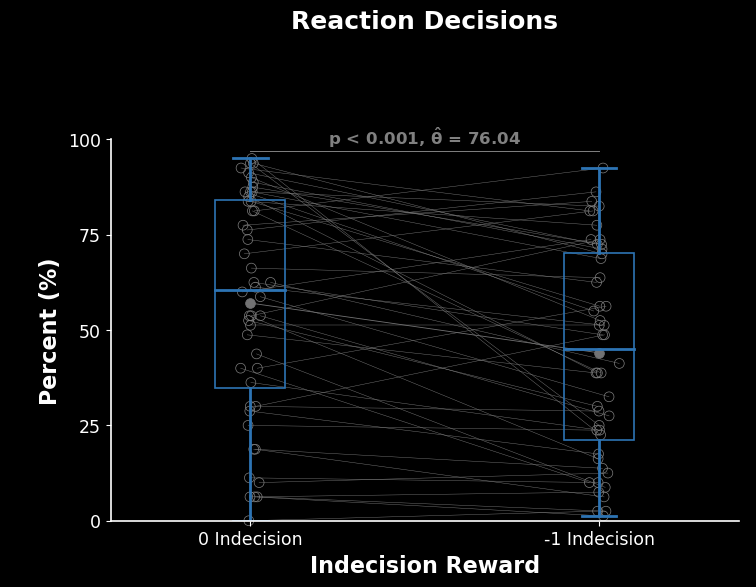

In [56]:
reactions_anova,reactions_statistics = so.run_statistics('Reaction Decisions',alternative = 'two-sided')
display(reactions_anova)
so.plot(reactions_statistics,'Reaction Decisions',title='Reaction Decisions',
                ylab='Percent (%)',ylocs=np.arange(0,125,25),lims=True,title_pad=80,h=0.5,
                cut_pvals = True)

Non-significant interaction, collapsing across conditions...


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Factor 1,5381.266276,1,23,5381.266276,19.102294,0.000224,0.000224,0.071550,1.0
1,Factor 2,4085.302734,1,23,4085.302734,17.384487,0.000369,0.000369,0.055271,1.0
2,Factor 1 * Factor 2,19.938151,1,23,19.938151,0.108060,0.745338,0.745338,0.000285,1.0


Collapsing, changed select conditions to be All


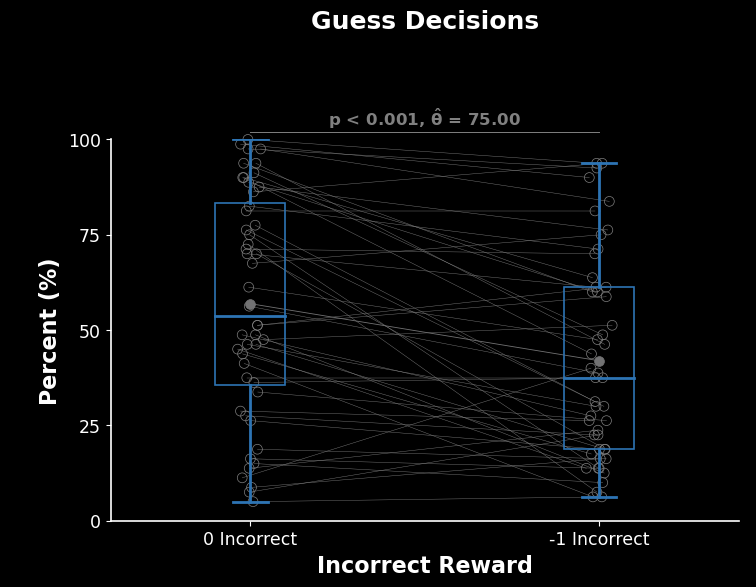

Collapsing, changed select conditions to be All


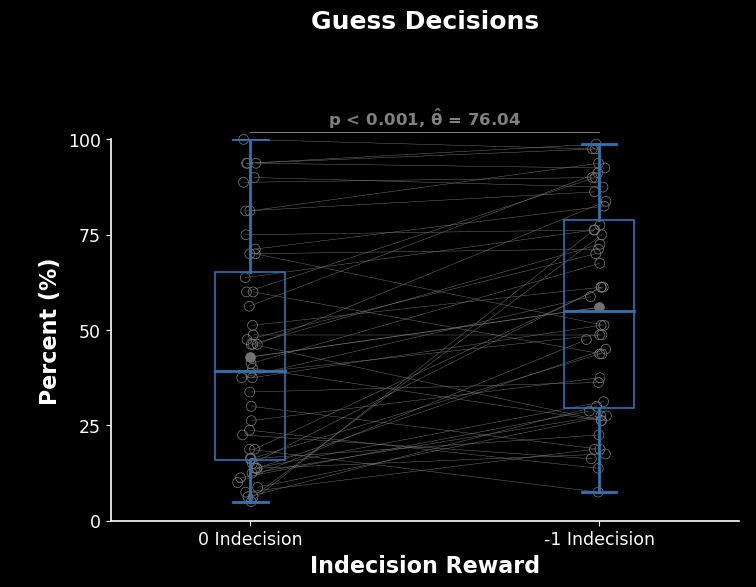

In [57]:
gambles_anova,gambles_statistics = so.run_statistics('Gamble Decisions',alternative = 'two-sided')
display(gambles_anova)
so.plot(gambles_statistics,'Gamble Decisions',title='Guess Decisions',
                ylab='Percent (%)',ylocs=np.arange(0,125,25),lims=True,title_pad=80,h=0.5,
                cut_pvals = True)